In [1]:
import tensorflow as tf
import keras as kr
import sklearn as sk 

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense 
from keras.layers import concatenate
from keras import Input


- 함수형 api

https://www.tensorflow.org/guide/keras/functional?hl=ko

https://www.tensorflow.org/api_docs/python/tf/keras

In [3]:
signalInput = Input((540,1),name="signal")

In [4]:
signalLayer1 = Conv1D(64,3,activation='relu')(signalInput)
signalLayer2 = MaxPooling1D(pool_size=2)(signalLayer1)
signalLayer3 = Conv1D(128,3,activation='relu')(signalLayer2)
signalLayer4 = MaxPooling1D(pool_size=2)(signalLayer3)
signalLayer5 = Conv1D(128,3,activation='relu')(signalLayer4)
signalLayer6 = MaxPooling1D(pool_size=2)(signalLayer5)
signalLayer7 = Conv1D(128,3,activation='relu')(signalLayer6)
signalLayer8 = MaxPooling1D(pool_size=2)(signalLayer7)
signalLayer9 = Flatten()(signalLayer8)

In [5]:
signalOuput = Dense(1,activation='softmax')(signalLayer9)

-----

In [6]:
intervalInput = Input((2),name="interval")

In [7]:
intervalOutput = Dense(1)(intervalInput)

---------

In [8]:
concen = concatenate([signalOuput,intervalOutput])

In [9]:
output = Dense(3)(concen)

In [10]:
model = kr.Model(inputs=[signalInput,intervalInput],outputs=[output])

----

https://codetorial.net/tensorflow/visualize_model.html

In [11]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
signal (InputLayer)             [(None, 540, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 538, 64)      256         signal[0][0]                     
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 269, 64)      0           conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 267, 128)     24704       max_pooling1d[0][0]              
______________________________________________________________________________________________

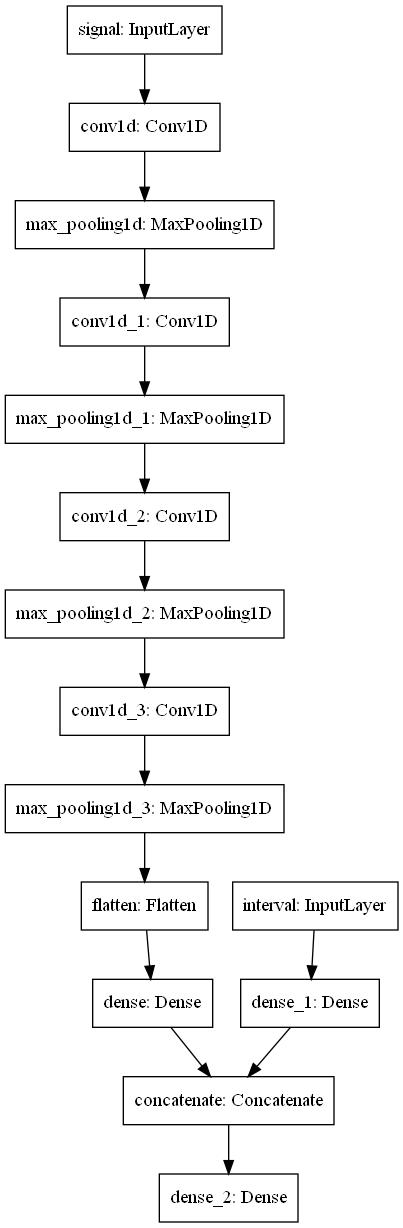

In [12]:
tf.keras.utils.plot_model(model,"ahha.jpg")